# Boom Bikes - Bike Sharing Assignment

## Problem Statement
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- 
Which variables are significant in predicting the demand for shared bike
-
How well those variables describe the bike den- 
- s
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across  he American market based on some factors. 

## Import libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Read the data

In [6]:
df = pd.read_csv('day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Checking the dimensions of the dataset
df.shape

(730, 16)

In [11]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- There are 730 records in dataset with 16 columns
- dteday is object rest all variables are either int or float
- Columns like season, yr, mnth, holiday, weekday, weathersit etc. are looking categorical
- Columns like temp, humm windspeed, cnt are numerical

## Data Cleaning

In [14]:
# Check null values present in all the columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# Checking any duplicate values
df.drop_duplicates(inplace = True)
# Verifying the shape
df.shape

(730, 16)

- No null values present in any of the columns
- As shape was same after removing duplicate values hence no duplicate records are present
- As per data dictionary, cnt=casual+registered hence we can remove the variables **casual** and **registered** as they are not needed and our main emphasis will be on **cnt** as target variable
- Since **instant** variable is just an index hence we can delete the same
- Also **dteday** variable is not needed as we alreasy have that data in form of yr, mnth, holiday and weekday


In [17]:
df_cl = df.drop(columns=['casual', 'registered', 'instant', 'dteday'])
df_cl.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
df_cl.shape

(730, 12)

## Map the values

##### Converting season into a categorical variable as given in data dictionary ((1:spring, 2:summer, 3:fall, 4:winter)

In [21]:
# Npte values of season column before mapping it
df_cl['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
# Replace the numbers to categorical values of season
df_cl['season'] = df_cl['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' })

In [23]:
# Confirm mapping values are done successfully
df_cl['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

##### Mapping mnth values (1, 2, 3, ... , 11, 12) into a categorical variable like January, February, March ... , November, December

In [25]:
# Check the different value counts for months
df_cl['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [26]:
# Map the numbers to values of the month
import calendar
df_cl['mnth'] = df_cl['mnth'].apply(lambda x: calendar.month_name[x])

In [27]:
# Verify the mapped values from above data
df_cl['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

##### Mapping weekday values (0, 1, 2, ... , 5, 6) into a categorical variable like Monday, Tuesday, Wednesday, ... , Saturday, Sunday

In [29]:
# Check the different value counts for weekday
df_cl['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [30]:
# Map the weekday numbers to names of the day
df_cl['weekday'] = df_cl['weekday'].apply(lambda x: calendar.day_name[x])

In [31]:
# Check the mapped value counts for weekday
df_cl['weekday'].value_counts()

weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: count, dtype: int64

##### Mapping **weathersit** into a categorical variable as per data dictionary
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
-  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mis
- - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clou
- 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [33]:
# Check the different value counts for weathersit
df_cl['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

##### Only 3 values are present so we will map them as below since we need to define categorically

- 1-Clear
- 2-Mist
- 3-Rainy
- 4-Snow

In [36]:
df_cl['weathersit'] = df_cl['weathersit'].replace({ 1: 'Clear', 2: 'Mist', 3: 'Rainy', 4: 'Bad' })

In [37]:
# Check the mapped value counts for weathersit
df_cl['weathersit'].value_counts()

weathersit
Clear    463
Mist     246
Rainy     21
Name: count, dtype: int64

In [38]:
df_cl.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## EDA - Exploratory Data Analysis

## Univariate Analysis

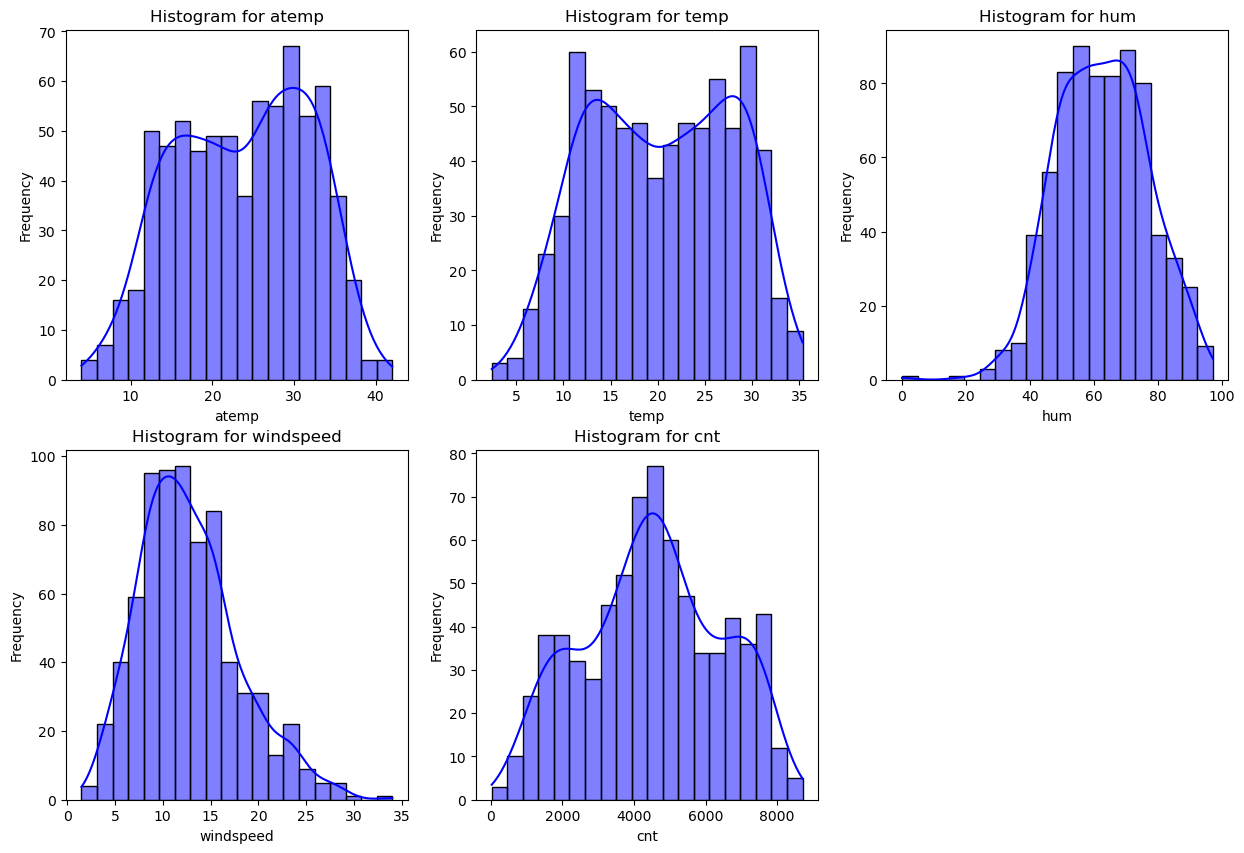

In [41]:
continuous_var = ['atemp', 'temp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(continuous_var, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid (2 rows, 3 columns)
    sns.histplot(df_cl[col], kde=True, color='blue', bins=20)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

In [42]:
df_cl[['atemp', 'temp', 'hum', 'windspeed', 'cnt']].describe()

,atemp,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,23.726322,20.319259,62.765175,12.763620,4508.006849
std,8.150308,7.506729,14.237589,5.195841,1936.011647
min,3.953480,2.424346,0.000000,1.500244,22.000000
25%,16.889713,13.811885,52.000000,9.041650,3169.750000
50%,24.368225,20.465826,62.625000,12.125325,4548.500000
75%,30.445775,26.880615,72.989575,15.625589,5966.000000
max,42.044800,35.328347,97.250000,34.000021,8714.000000


In [43]:
# Check the correlation in numerical variables
df_num = df_cl[['atemp', 'temp', 'hum', 'windspeed', 'cnt']]
df_num.corr()

,atemp,temp,hum,windspeed,cnt
atemp,1.000000,0.991696,0.141512,-0.183876,0.630685
temp,0.991696,1.000000,0.128565,-0.158186,0.627044
hum,0.141512,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.183876,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.630685,0.627044,-0.098543,-0.235132,1.000000


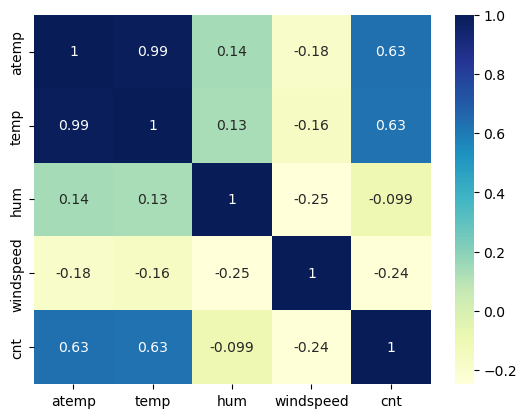

In [44]:
# Correlation matrix
sns.heatmap(df_num.corr(), annot=True, cmap="YlGnBu")
plt.show()

Insights:
- temp and atemp have a very high correlation with each other and hence they will have similar effect so atemp and temp collinearity needs to be checked
- temp have good correlation with cnt and hence should be considered
- The mean or avg temperature is 20°C, Humidity is 62, windspeed is 12 and rental count is 4508
- There is a normal distribution seen in cnt which is our target variable

##### Analysing the categorical variables

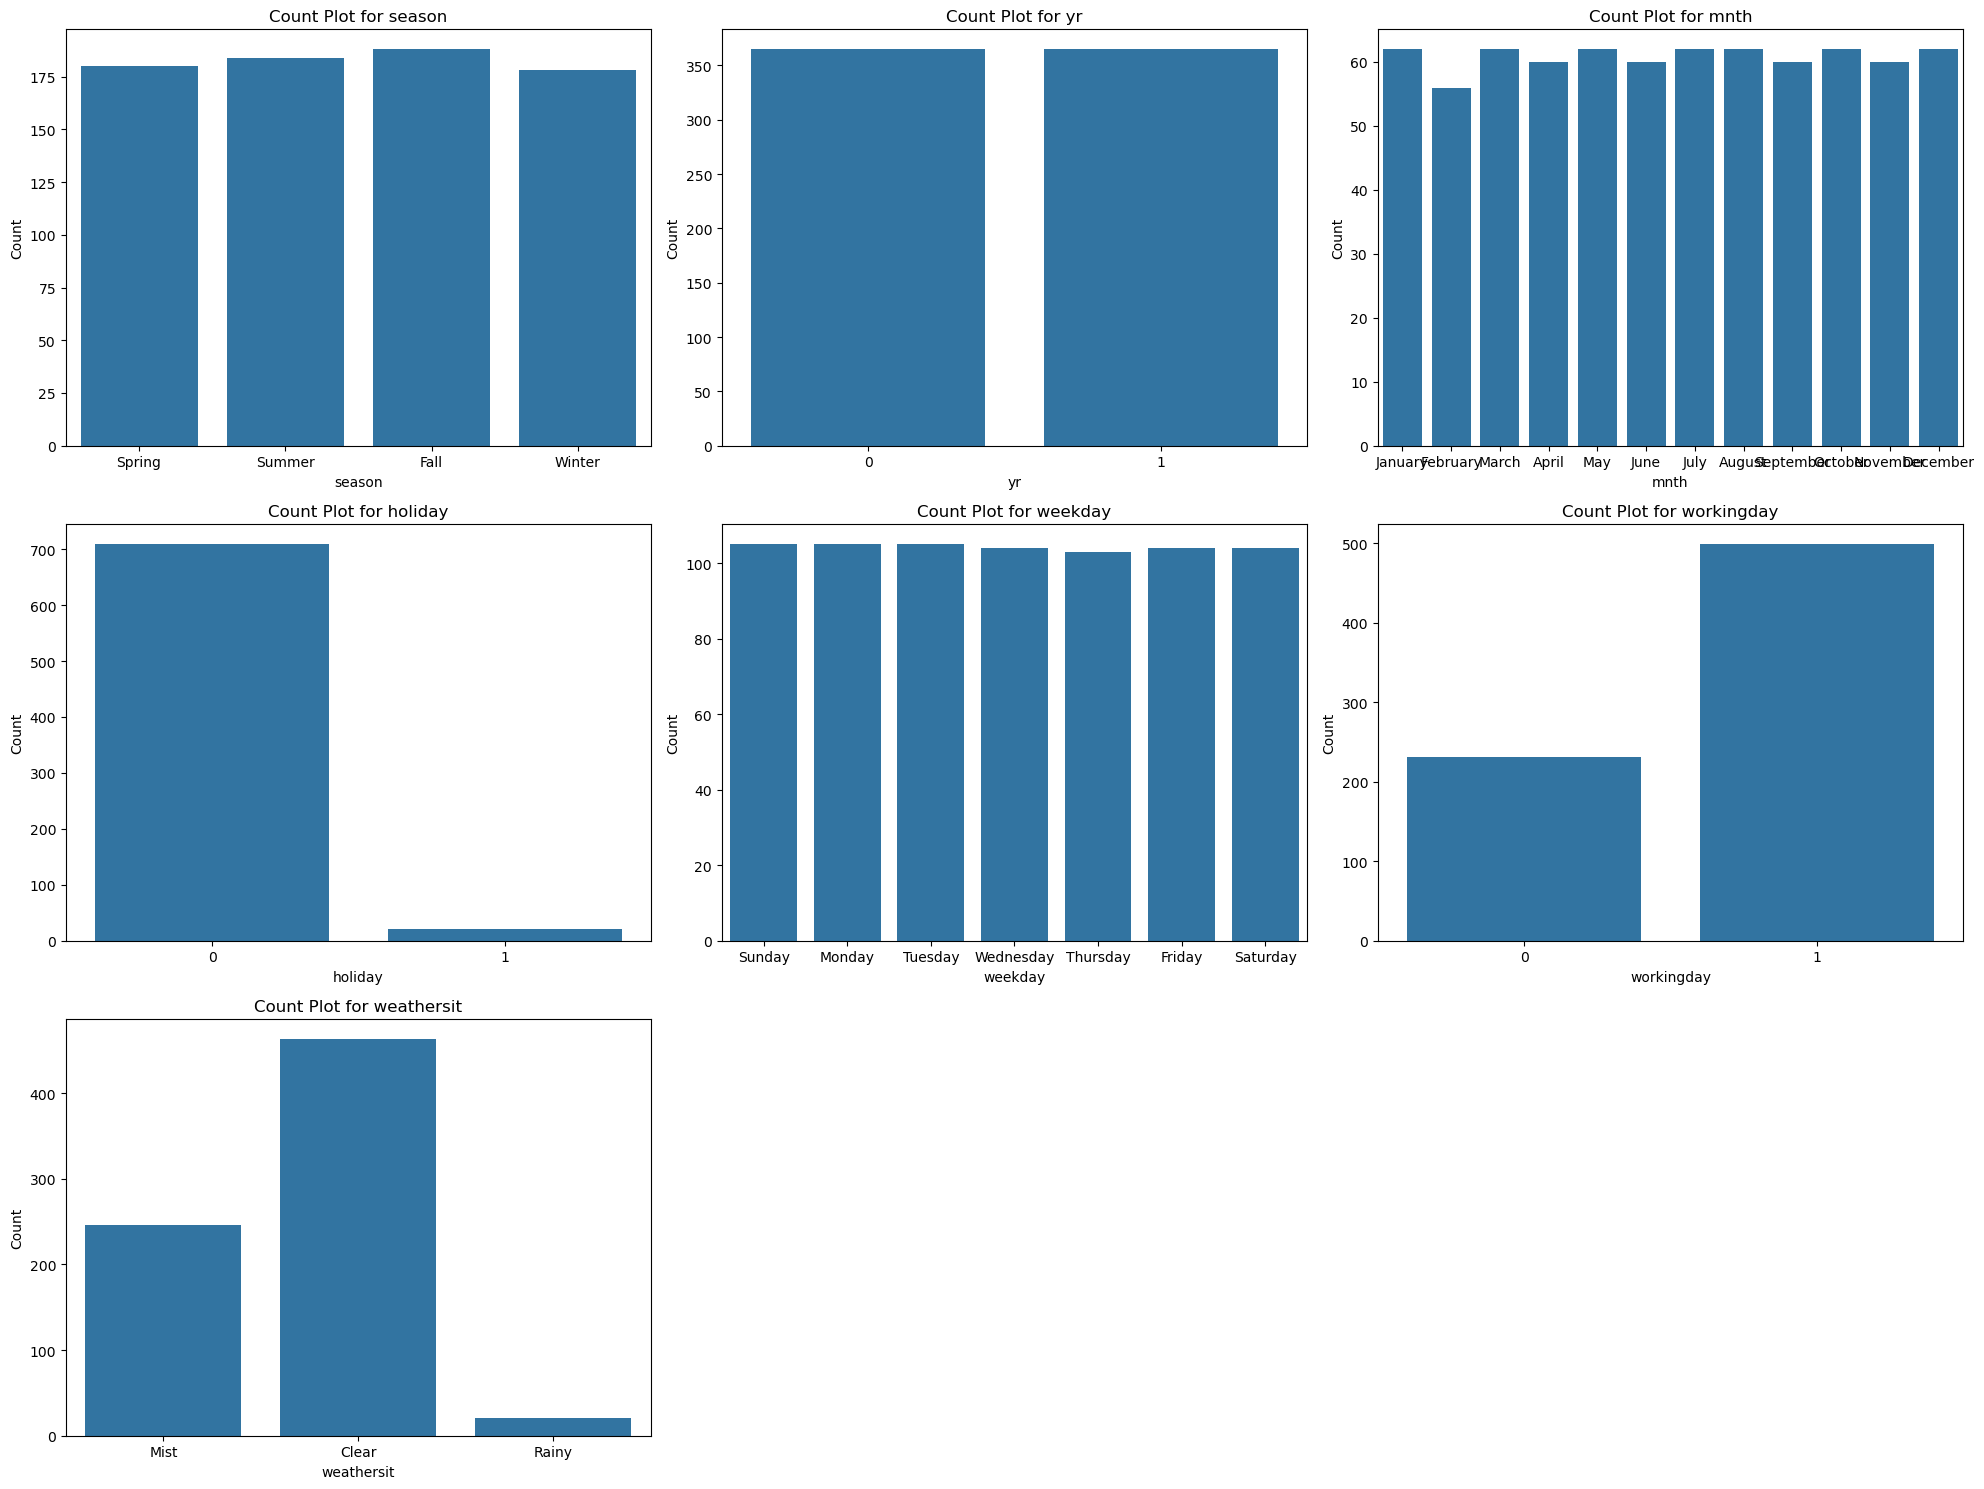

In [47]:
# List of categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Plot count plots for each categorical variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3 rows, 3 columns)
    sns.countplot(data=df_cl, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### In variables weathersit, holiday and working day we can see the variation and others are having similar count

### Bivariate Analysis

##### Numerical Variables Analysis

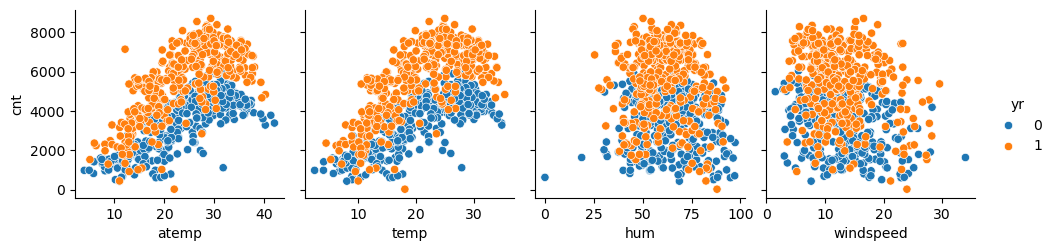

In [51]:
sns.pairplot(x_vars=['atemp', 'temp', 'hum', 'windspeed'], y_vars='cnt', data=df_cl, hue='yr')
plt.show()

##### Year has a visible growth from 2018 to 2019
##### There is a linear relation between temperature and cnt

##### Categorical Variables Analysis

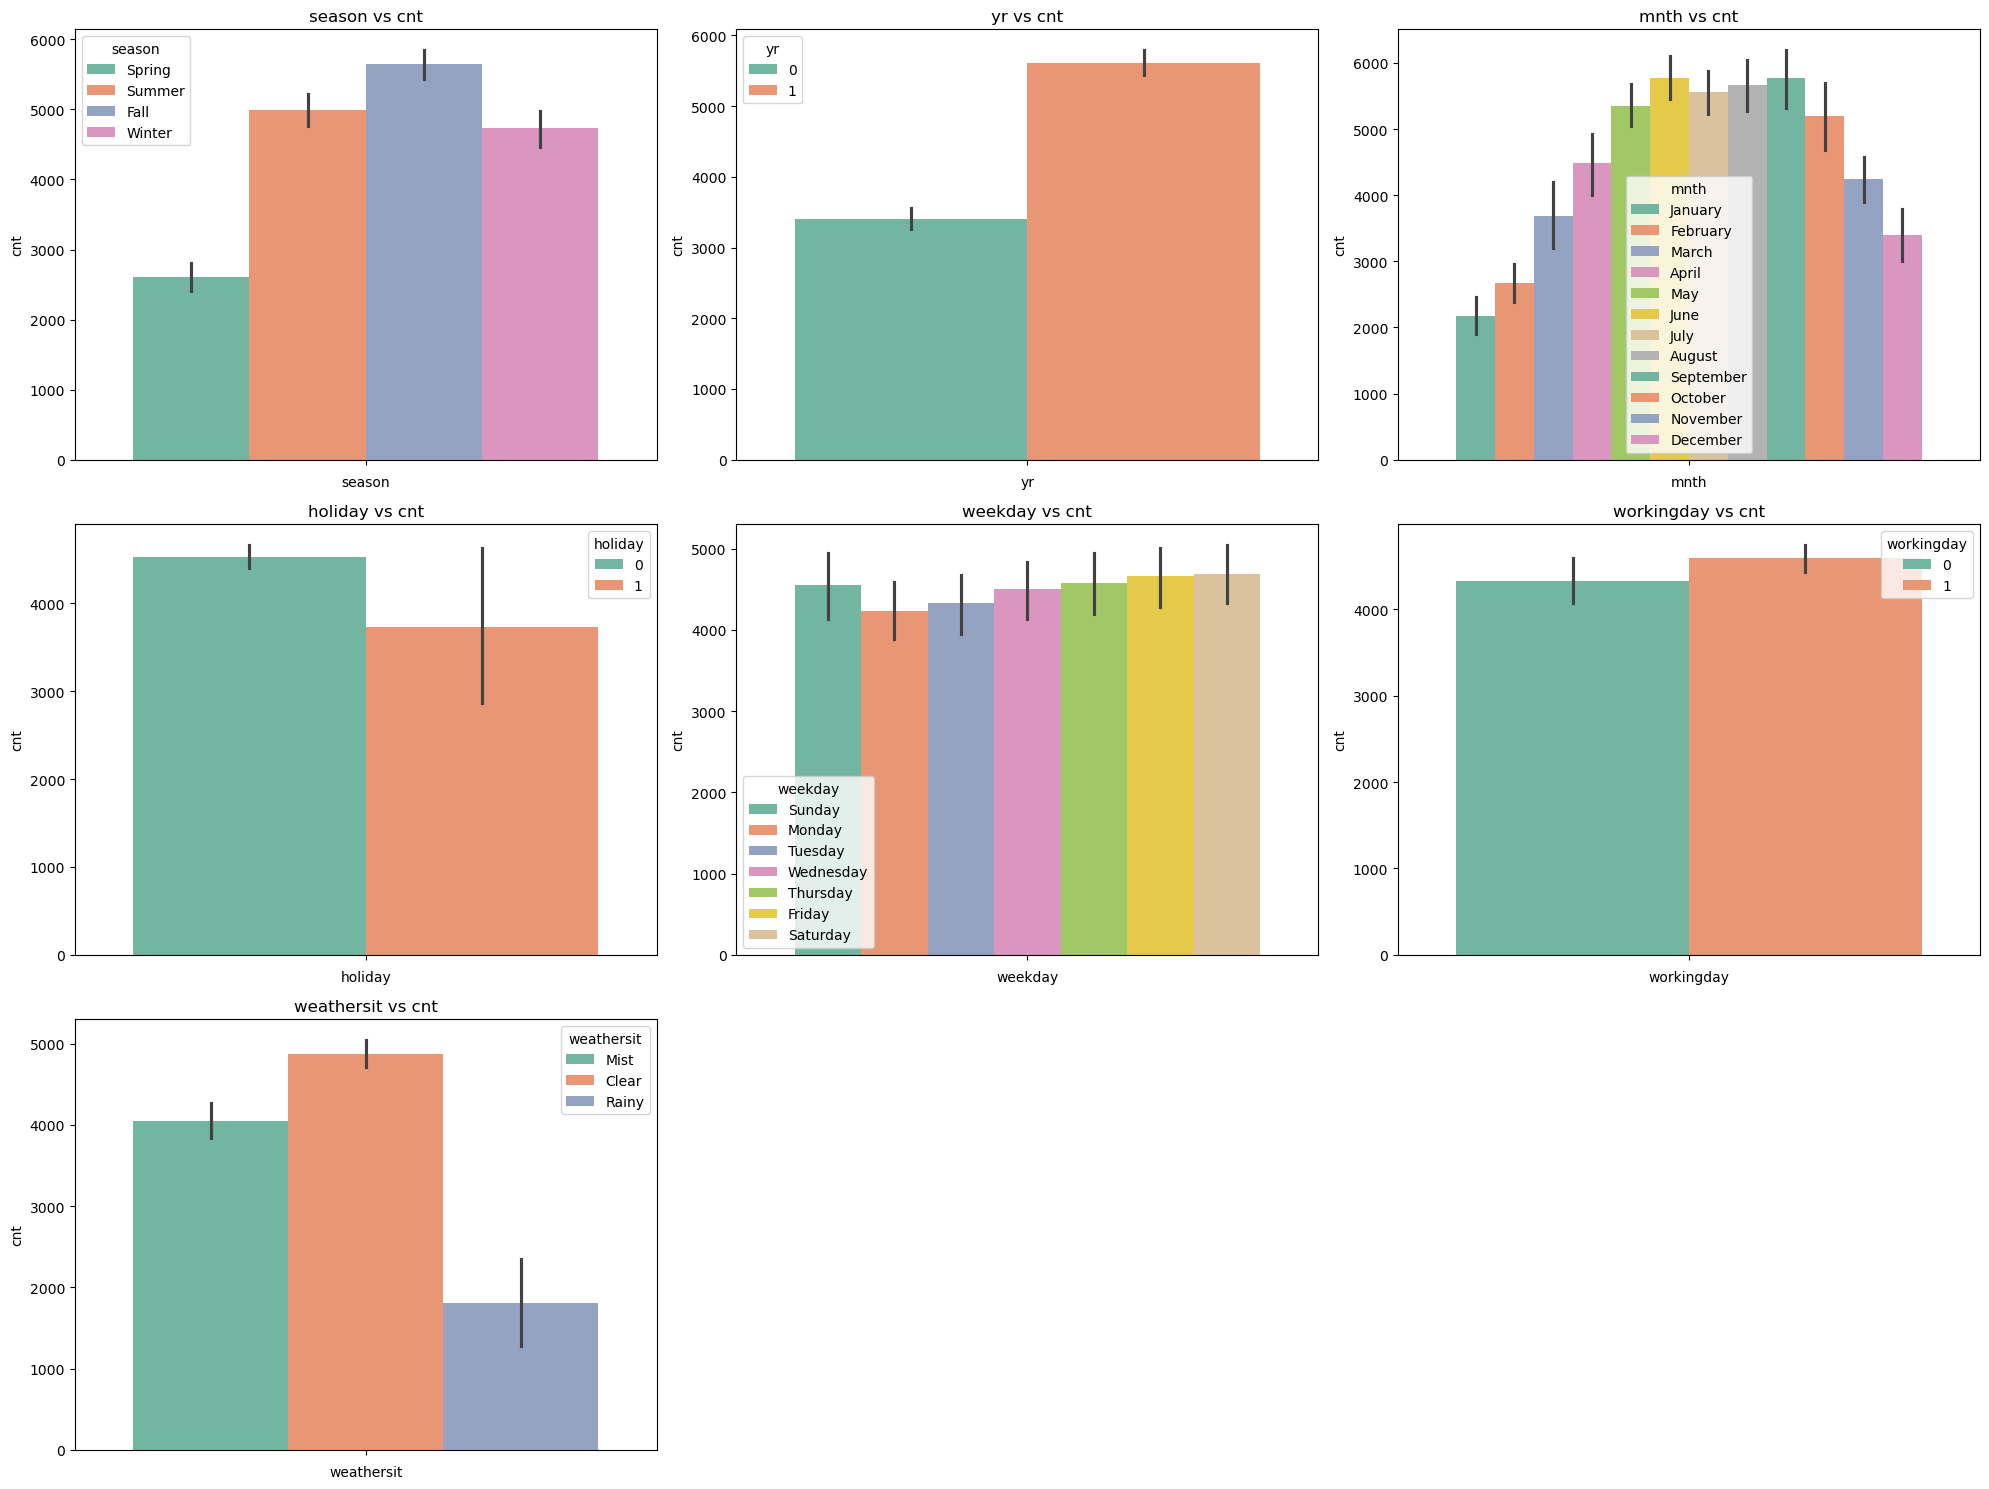

In [54]:
# List of categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Plot barplot for each categorical variable against 'cnt'
plt.figure(figsize=(20, 15))  # Adjust figure size
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3 rows, 3 columns)
    sns.barplot(data=df_cl, hue=col, y='cnt', palette='Set2', legend=True)
    plt.title(f'{col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('cnt')    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

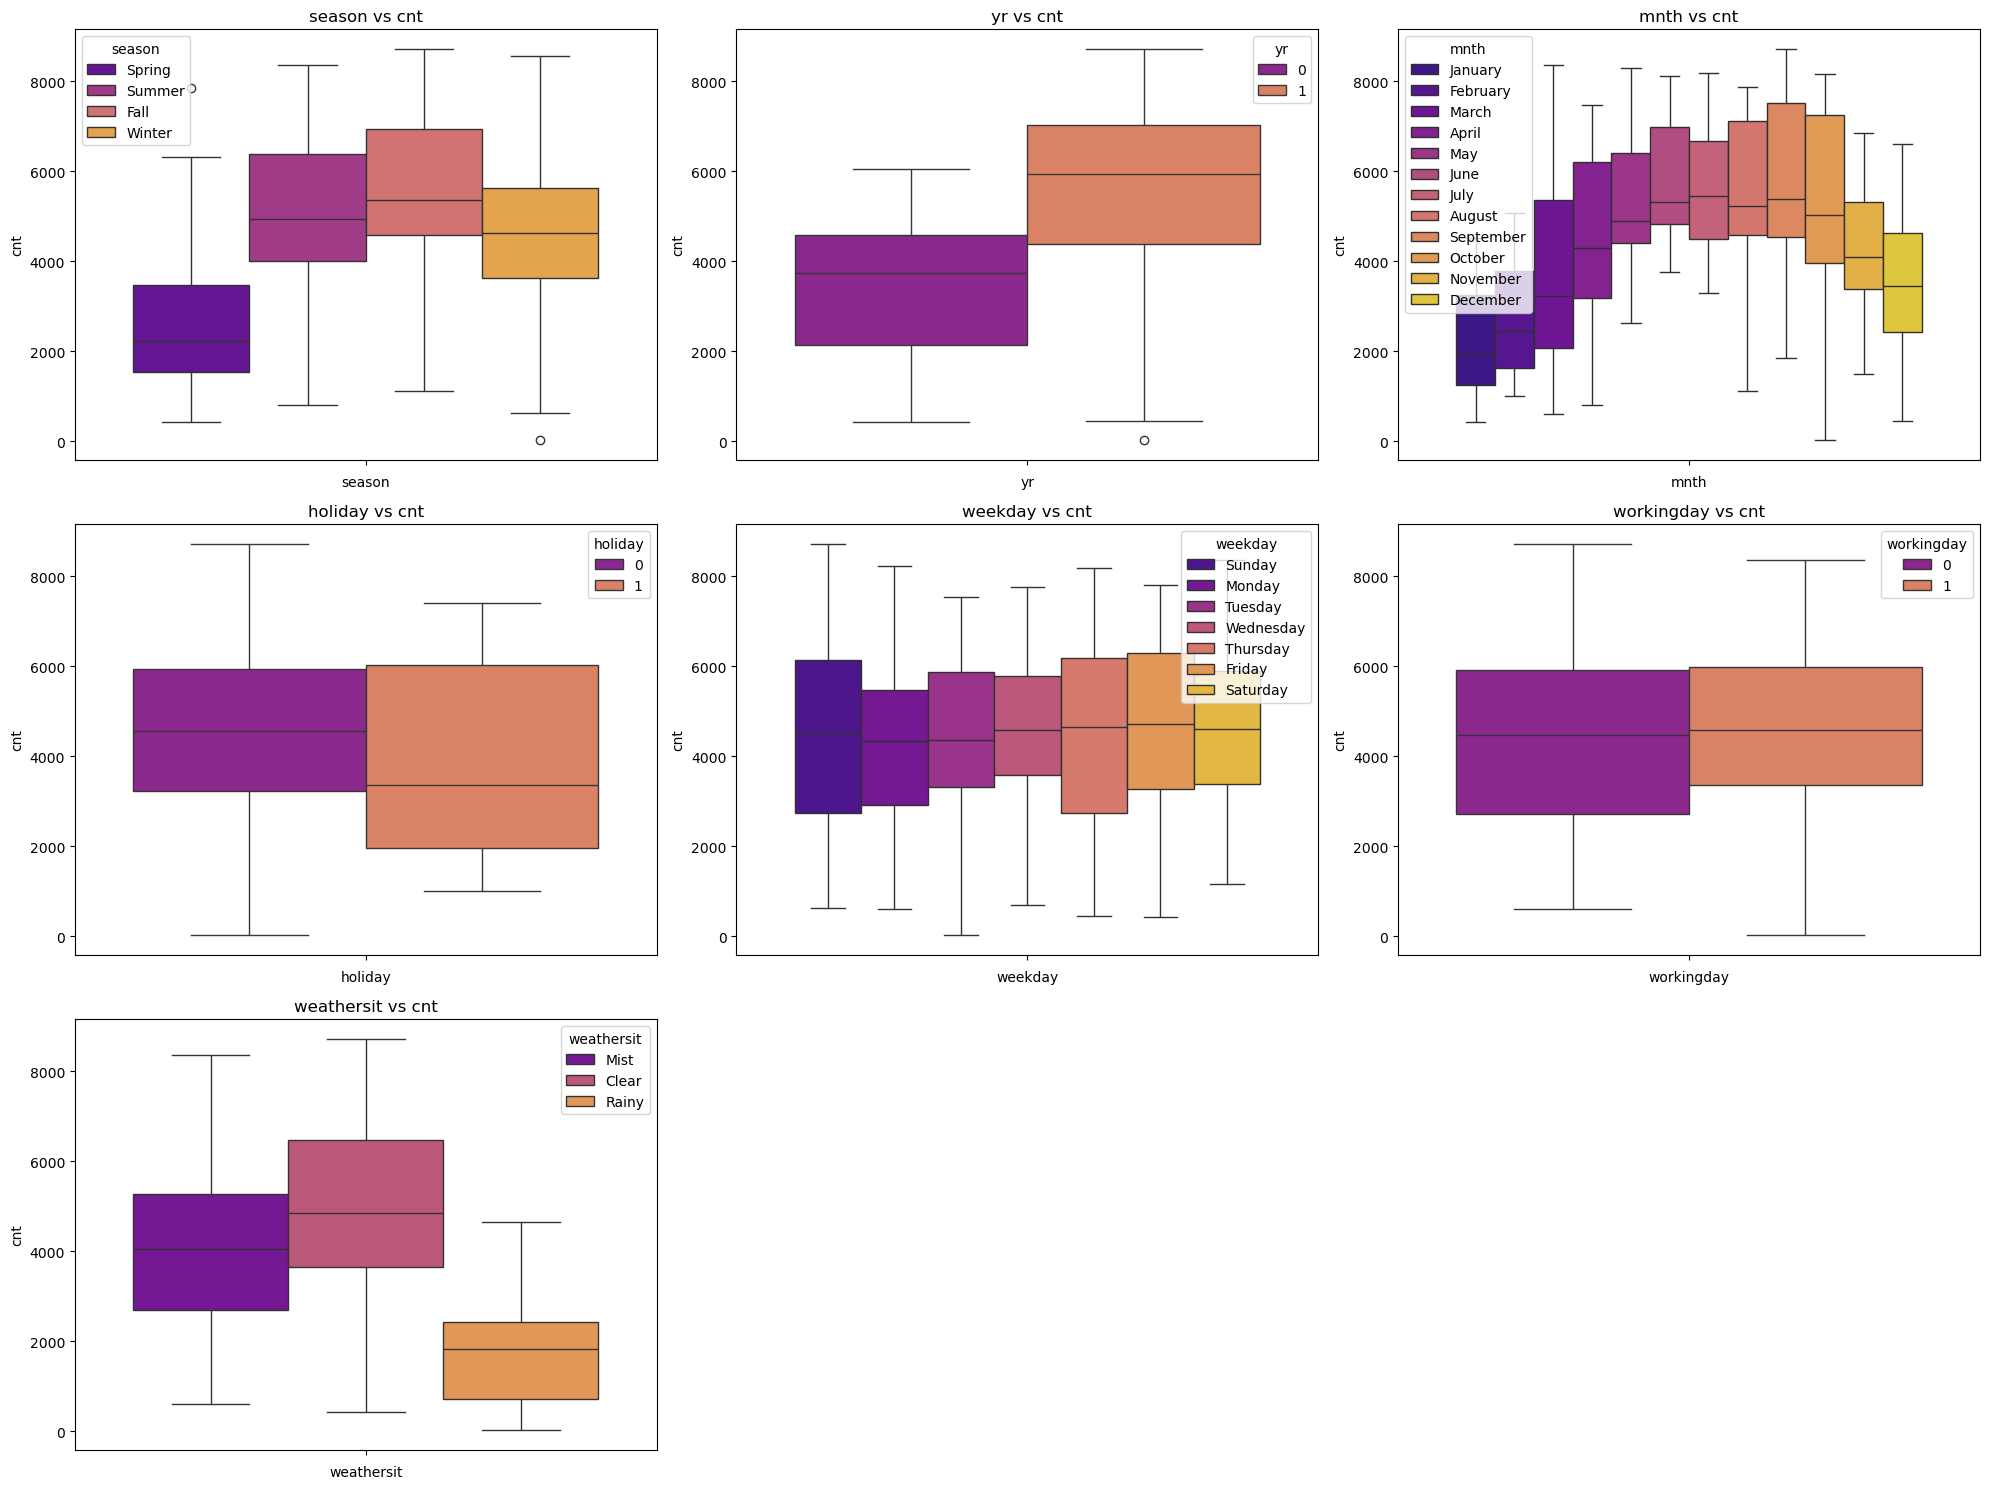

In [55]:
# List of categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Plot boxplots for each categorical variable against 'cnt'
plt.figure(figsize=(20, 15))  # Adjust figure size
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3 rows, 3 columns)
    sns.boxplot(data=df_cl, hue=col, y='cnt', palette='plasma')
    plt.title(f'{col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('cnt')    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##### As the count of Rental Bike gets impacted due to Season showing Spring as lowest and Fall as highest hence this is good predictor variable
##### Rental bikes count is increasing from the year 2018 to 2019, hence it is important variable for model
##### In mid of year from June to Sept there is very high usage of rental bikes with June and September month showing the highest values. This shows that month can be good predictor in bike rentals
##### There is a trend in Weather and Clear weather has maximum bike rental and hence this variable can be good predictor variable
##### People are using Bike rental more in working days and when no Holiday was there

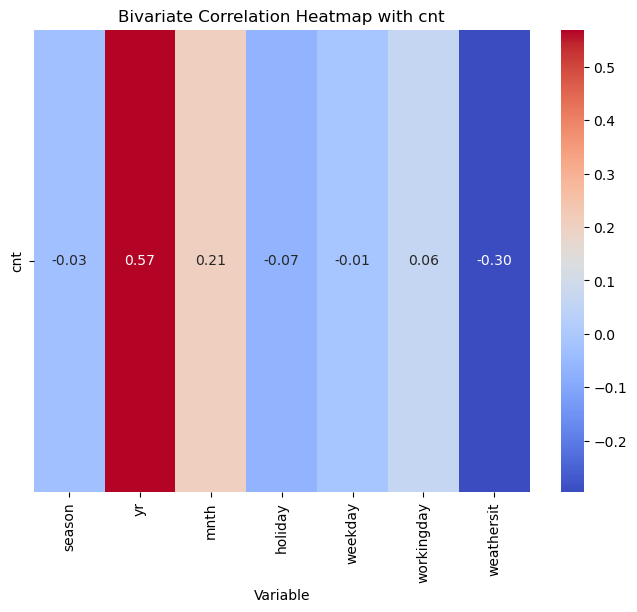

In [57]:
# Example encoding of categorical variables (using label encoding for simplicity)
encoded_df = df_cl.copy()
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Convert categorical variables to numeric using label encoding
for col in categorical_vars:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

# Compute bivariate correlation of each categorical variable with 'cnt'
correlations = encoded_df[categorical_vars + ['cnt']].corr()['cnt'].drop('cnt')

# Convert to DataFrame for visualization
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'cnt']

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.set_index('Variable').T, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Bivariate Correlation Heatmap with cnt')
plt.show()

##### yr variable has strong correlation with cnt variable

### Multivariate Analysis

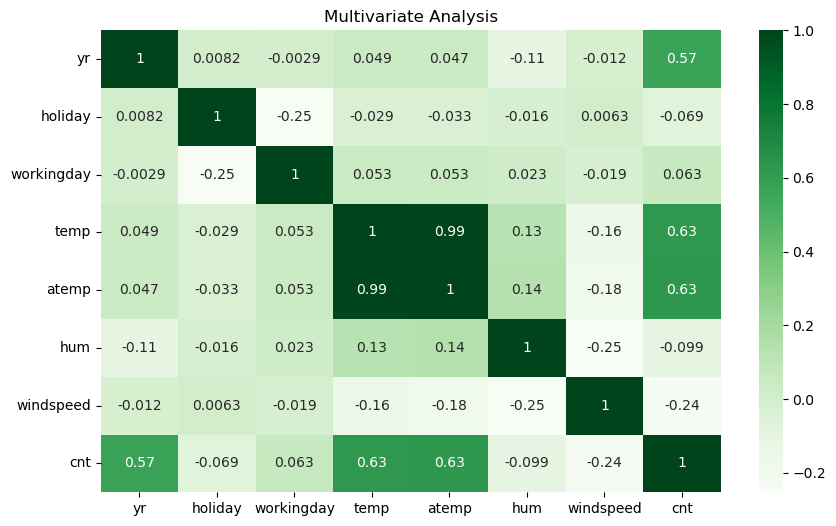

In [60]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_cl.corr(numeric_only = True), annot = True, cmap = 'Greens')

plt.title("Multivariate Analysis")
plt.show()

##### Year, Temp and ATemp variable are having good correlation with cnt
##### Hum and Windspeed have negative correlation with cnt

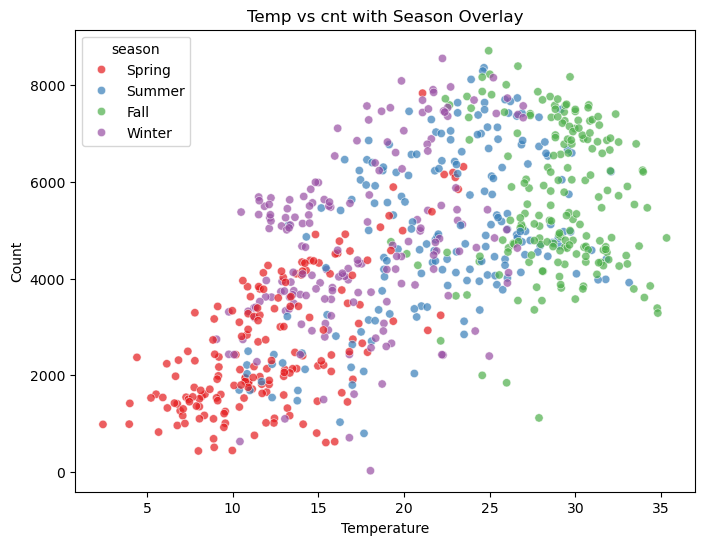

In [62]:
# Scatter plot of temp vs cnt, with season overlay
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cl, x='temp', y='cnt', hue='season', palette='Set1', alpha=0.7)
plt.title('Temp vs cnt with Season Overlay')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

### Dummy Variables Creation

In [64]:
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_cl[categorical_vars].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

##### Season. mnth, weekday, weathersit are variables having more than 2 categorical values and hence are candidate for dummy variables

In [66]:
# Create dummy variables
df_cl = pd.get_dummies(df_cl, columns=categorical_vars, drop_first=True)

df_cl = df_cl.astype({col: int for col in df_cl.select_dtypes('bool').columns})

# Display the resulting dataframe
print(df_cl.head())

        temp     atemp      hum  windspeed   cnt  season_Spring  \
0  14.110847  18.18125  80.5833  10.749882   985              1   
1  14.902598  17.68695  69.6087  16.652113   801              1   
2   8.050924   9.47025  43.7273  16.636703  1349              1   
3   8.200000  10.60610  59.0435  10.739832  1562              1   
4   9.305237  11.46350  43.6957  12.522300  1600              1   

   season_Summer  season_Winter  yr_1  mnth_August  ...  holiday_1  \
0              0              0     0            0  ...          0   
1              0              0     0            0  ...          0   
2              0              0     0            0  ...          0   
3              0              0     0            0  ...          0   
4              0              0     0            0  ...          0   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               0                 0               1                 0   
1               1             

In [67]:
df_cl.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_August,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Mist,weathersit_Rainy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [68]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               730 non-null    float64
 1   atemp              730 non-null    float64
 2   hum                730 non-null    float64
 3   windspeed          730 non-null    float64
 4   cnt                730 non-null    int64  
 5   season_Spring      730 non-null    int32  
 6   season_Summer      730 non-null    int32  
 7   season_Winter      730 non-null    int32  
 8   yr_1               730 non-null    int32  
 9   mnth_August        730 non-null    int32  
 10  mnth_December      730 non-null    int32  
 11  mnth_February      730 non-null    int32  
 12  mnth_January       730 non-null    int32  
 13  mnth_July          730 non-null    int32  
 14  mnth_June          730 non-null    int32  
 15  mnth_March         730 non-null    int32  
 16  mnth_May           730 non

In [69]:
df_cl.shape

(730, 30)

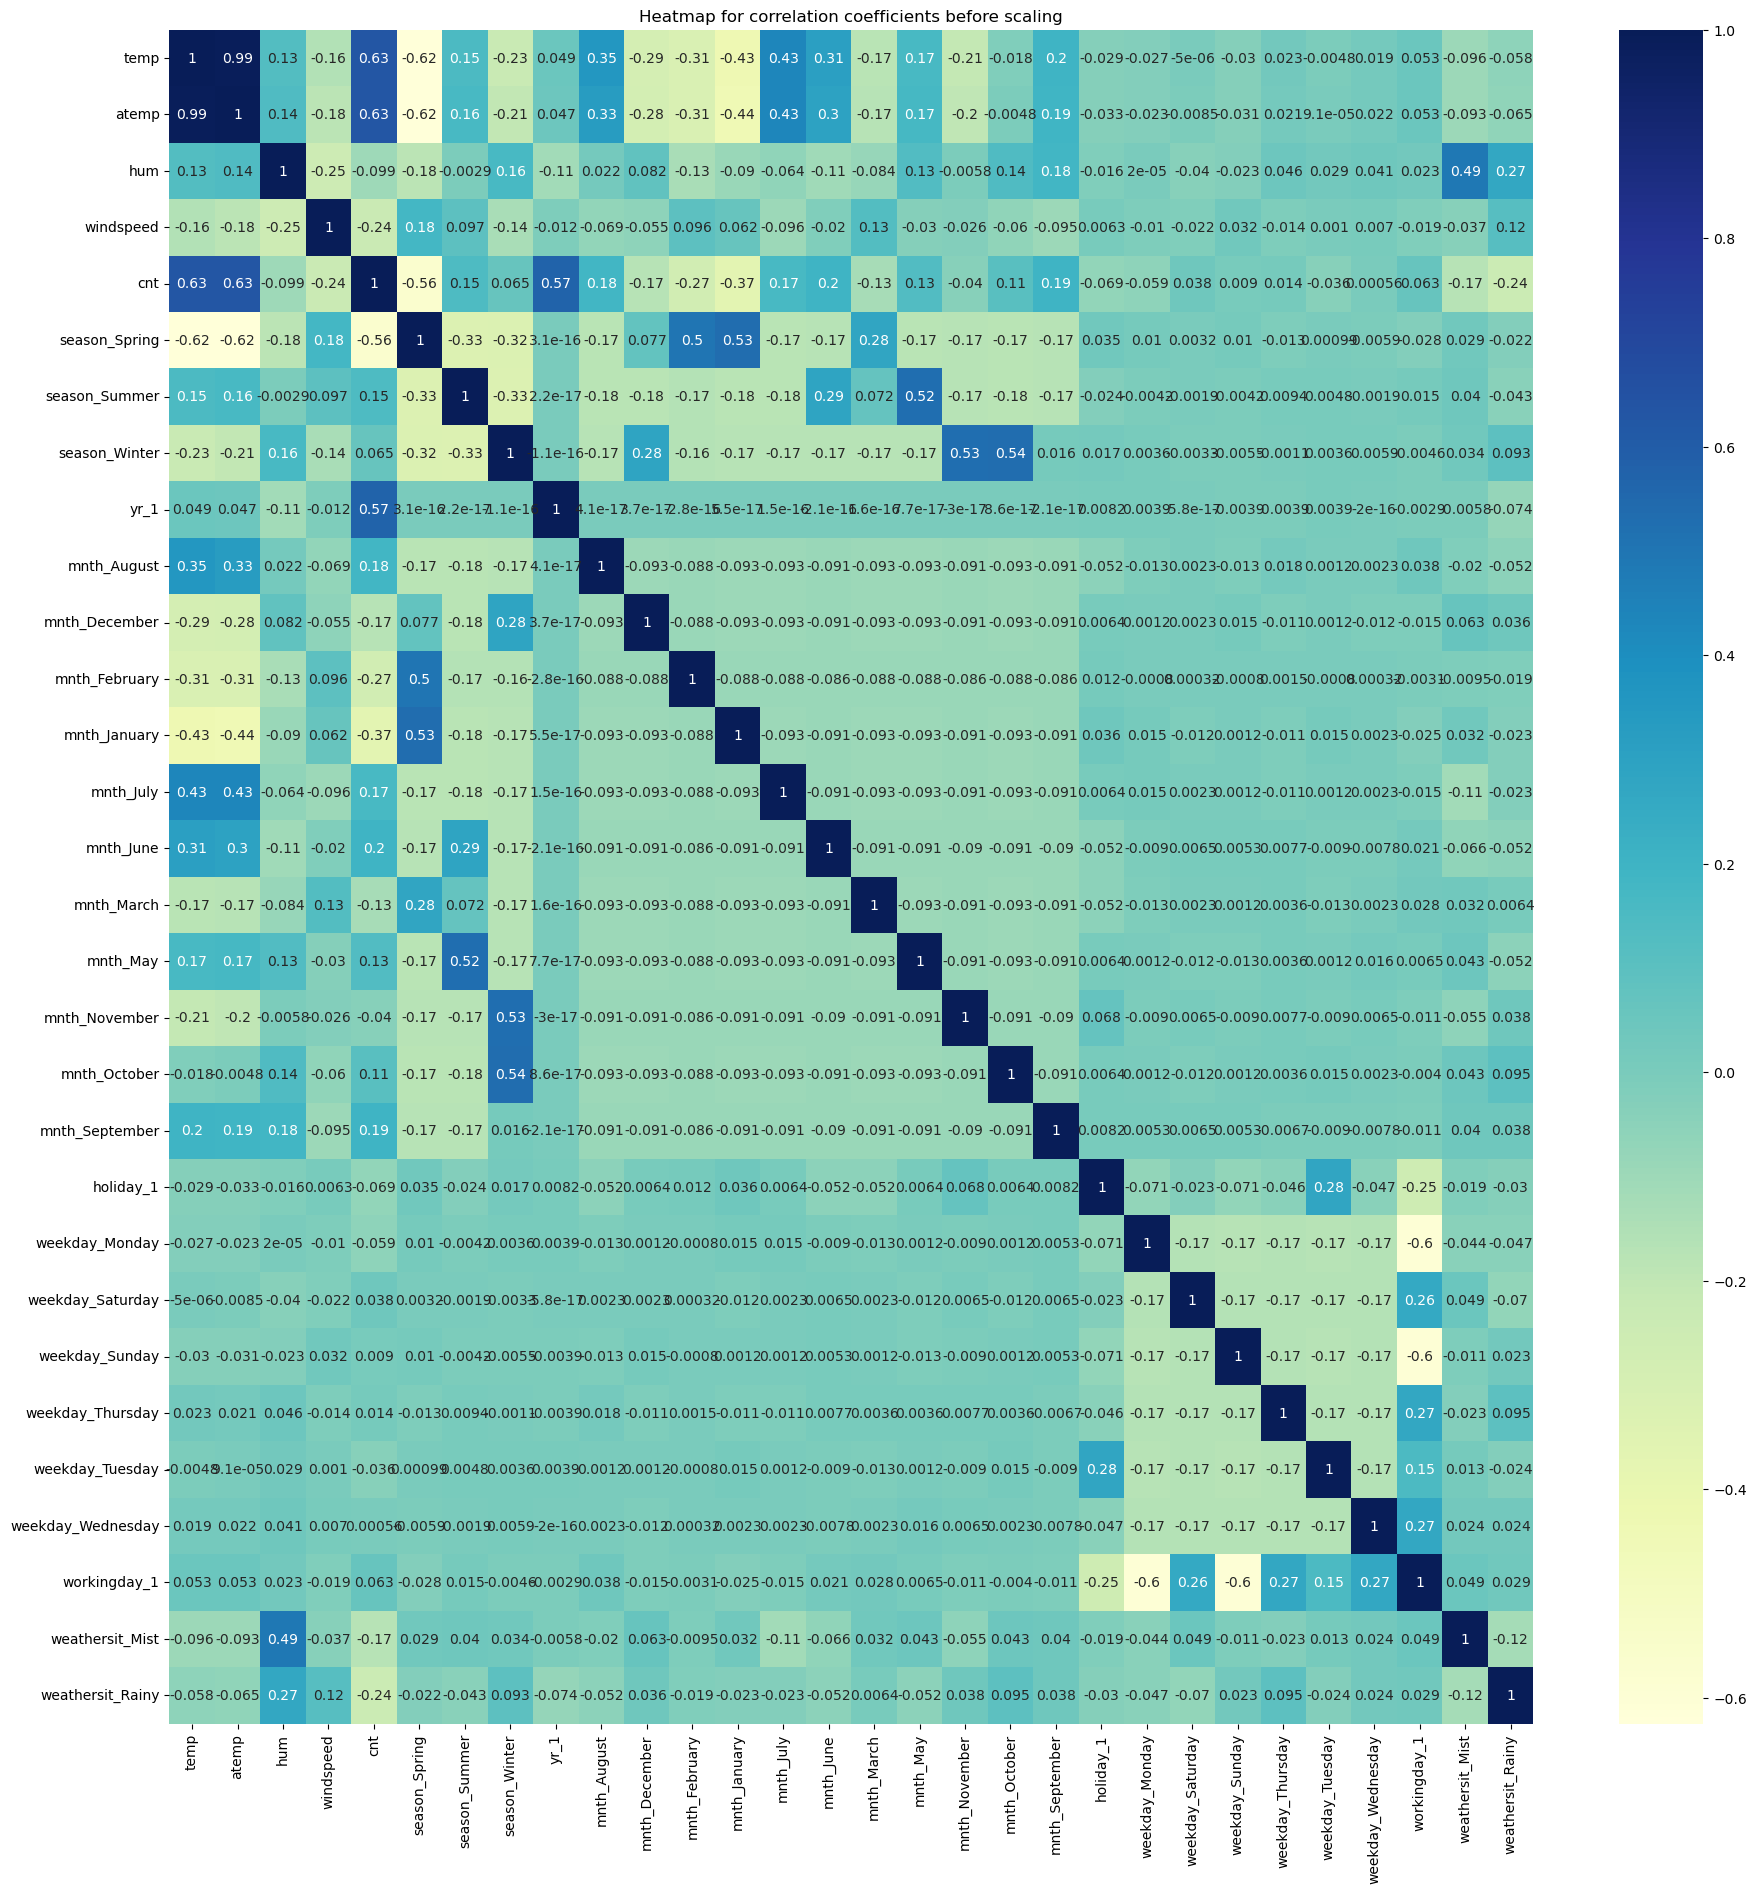

In [70]:
# Verifying the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize = (22, 22))
sns.heatmap(df_cl.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap for correlation coefficients before scaling')
plt.show()


### Scaling Data Using StandardScaler and MinMaxScaler
Data scaling transforms features to be on a similar scale, which is crucial for machine learning algorithms sensitive to feature magnitude.
- StandardScaler transforms data to have a mean of 0 and a standard deviation of 1 (z-score normalization).
- MinMaxScaler Transforms data to fit within a fixed range, typically (0, 1)


In [72]:
# Use MinMaxScaler to scale values
scaler = MinMaxScaler()

# Fit and transform training set
df_cl_scaled = pd.DataFrame(scaler.fit_transform(df_cl), columns = df_cl.columns, index = df_cl.index)

In [73]:
df_cl_scaled.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_August,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Mist,weathersit_Rainy
0,0.355170,0.373517,0.828620,0.284606,0.110792,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.379232,0.360541,0.715771,0.466215,0.089623,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.171000,0.144830,0.449638,0.465740,0.152669,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.175530,0.174649,0.607131,0.284297,0.177174,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.209120,0.197158,0.449313,0.339143,0.181546,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


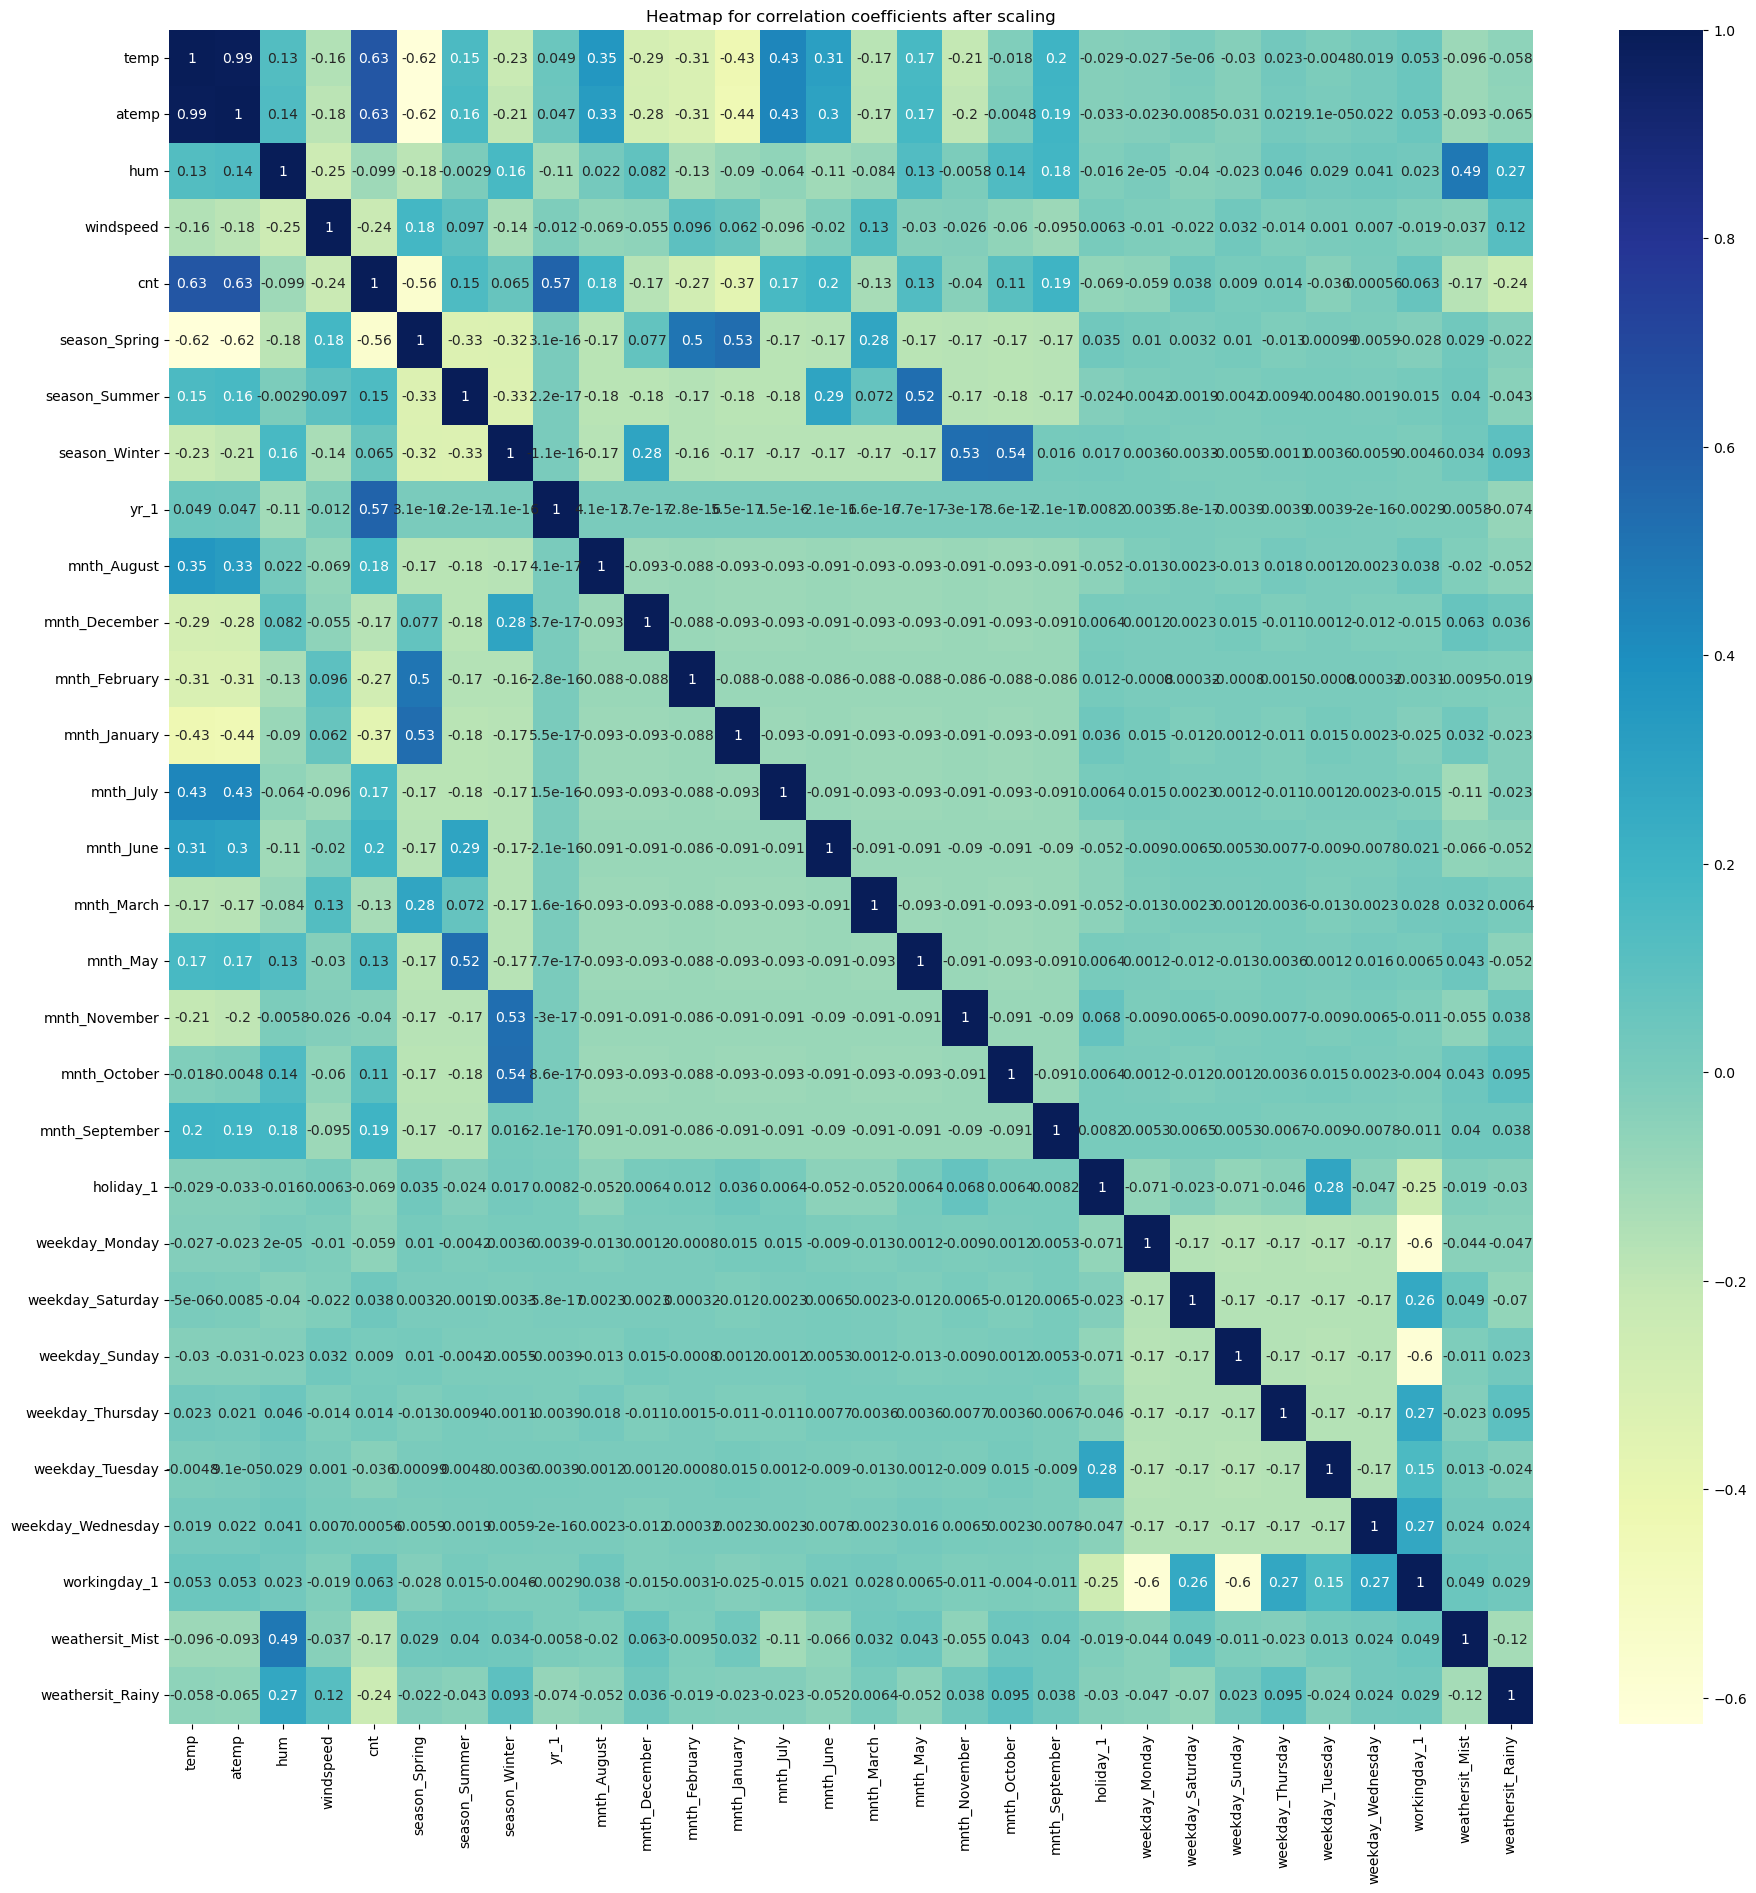

In [74]:
# Verifying the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize = (22, 22))
sns.heatmap(df_cl_scaled.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap for correlation coefficients after scaling')
plt.show()

##### cnt variable has good correlation with yr_1 i.e. 2019 and temp variables and similar results we have noticed previously also in EDA.

### Train Test Split 

In [77]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = df_cl_scaled.drop('cnt', axis = 1)
y = df_cl_scaled['cnt']

In [78]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [79]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 29)
(510,)
(220, 29)
(220,)


In [80]:
# Inspect the head of the training set
X_train.head()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_August,mnth_December,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Mist,weathersit_Rainy
576,0.815169,0.766351,0.724079,0.294871,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
426,0.442393,0.438975,0.638817,0.285911,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
728,0.245101,0.200348,0.497001,0.676936,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.395666,0.391735,0.503427,0.221789,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
111,0.345824,0.318819,0.750214,0.406392,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Training the model

##### RFE

In [83]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE for 15 vars
rfe = rfe.fit(X_train, y_train)

In [84]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_August', False, 7),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 15),
 ('mnth_May', False, 6),
 ('mnth_November', False, 2),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('workingday_1', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Rainy', True, 1)]

In [85]:
# storing the selected 15 variables in col list
selected_features  = X_train.columns[rfe.support_]
selected_features 

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_1', 'mnth_January', 'mnth_July', 'mnth_September',
       'holiday_1', 'weekday_Sunday', 'workingday_1', 'weathersit_Mist',
       'weathersit_Rainy'],
      dtype='object')

In [86]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train.columns[~rfe.support_]
rejected_features

Index(['atemp', 'mnth_August', 'mnth_December', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [87]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

### After minimizing the number of variables using RFE, using statsmodel to build an optimized model.

In [89]:
def model(X,y):
    X=sm.add_constant(X)
    lm_model=sm.OLS(y,X).fit()
    print(lm_model.summary())
    return X

def VIF(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

##### Model 1: Training the first model

In [91]:
#Training the first model
X_train_m1 = model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        21:15:10   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2599      0.037  

### Observations:
- Temperature and year are major positive drivers.
- Humidity, windspeed, and adverse weather (mist/rain) negatively impact activity.
- Seasonal and month-based effects highlight demand variations.

In [93]:
#Calculating VIF - Variance Inflation Factor
VIF(X_train_m1)

,Features,VIF
0,const,86.63
4,season_Spring,5.08
1,temp,3.89
6,season_Winter,3.59
5,season_Summer,2.65
2,hum,1.91
13,workingday_1,1.88
12,weekday_Sunday,1.78
8,mnth_January,1.57
14,weathersit_Mist,1.57


#### Observations
- For constant, **const** the VIF = 86.63, which is extremely high which is expected
- **season_Spring** has a VIF of 5.08, suggesting mild multicollinearity with other seasonal variables
- **temp** (VIF = 3.89), **season_Winter** (VIF = 3.59), and **season_Summer** (VIF = 2.65) are below < 5 hence no concern
- **hum**, **workingday_1**, and month-related variables (mnth_January, mnth_July, mnth_September), have VIF<2, indicating negligible multicollinearity.
- **yr_1** (Year): VIF = 1.04, which is extremely low, indicating no multicollinearity with other variables suggesting it as an independent predictor

### Model 2: Remove season (season_Spring) because it has a marginal VIF of 5.08 and P-Value of .014

In [96]:
# drop Spring variable
X_train_rfe2 = X_train_rfe.drop(['season_Spring'], axis = 1)

In [97]:
#Training the second model
X_train_m2 = model(X_train_rfe2,y_train)

#Calculating VIF
VIF(X_train_m2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.98e-191
Time:                        21:15:10   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2094      0.030  

,Features,VIF
0,const,59.43
1,temp,2.07
2,hum,1.89
12,workingday_1,1.88
11,weekday_Sunday,1.78
13,weathersit_Mist,1.56
7,mnth_January,1.55
5,season_Winter,1.53
8,mnth_July,1.43
4,season_Summer,1.41


### Model 3: Remove Holiday (holiday_1) because it has a P-Value of .028 although it has low VIF of 1.16

In [99]:
# drop Spring variable
X_train_rfe3 = X_train_rfe2.drop(['holiday_1'], axis = 1)

In [100]:
#Training the second model
X_train_m3 = model(X_train_rfe3,y_train)

#Calculating VIF
VIF(X_train_m3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.53e-191
Time:                        21:15:10   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1990      0.030  

,Features,VIF
0,const,58.03
1,temp,2.07
2,hum,1.89
11,workingday_1,1.65
10,weekday_Sunday,1.64
12,weathersit_Mist,1.56
7,mnth_January,1.55
5,season_Winter,1.53
8,mnth_July,1.43
4,season_Summer,1.41


### Model 4: Remove Month (mnth_January) because it has a P-Value of .022 although it has low VIF of 1.55

In [102]:
# drop Spring variable
X_train_rfe4 = X_train_rfe3.drop(['mnth_January'], axis = 1)

In [103]:
#Training the second model
X_train_m4 = model(X_train_rfe4,y_train)

#Calculating VIF
VIF(X_train_m4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.14e-191
Time:                        21:15:10   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1793      0.029  

,Features,VIF
0,const,53.37
2,hum,1.88
10,workingday_1,1.65
9,weekday_Sunday,1.64
1,temp,1.60
11,weathersit_Mist,1.56
7,mnth_July,1.43
4,season_Summer,1.33
5,season_Winter,1.29
12,weathersit_Rainy,1.24


#### The model is deemed satisfactory with a remarkably low Prob (F-statistic) of 4.14e-191, features displaying low p-values and VIF, and R-squared value of 0.843 and Adjusted R-squared value of 0.839. This will serve as the final evaluation model.

### Model Evaluation

#### Residual Analysis

In [107]:
train_final_model = sm.OLS(y_train,X_train_m4).fit()

In [108]:
# Fetch the final model and the Y_train_pred from the train_final_model
y_train_pred = train_final_model.predict(X_train_m4)

<Figure size 800x500 with 0 Axes>

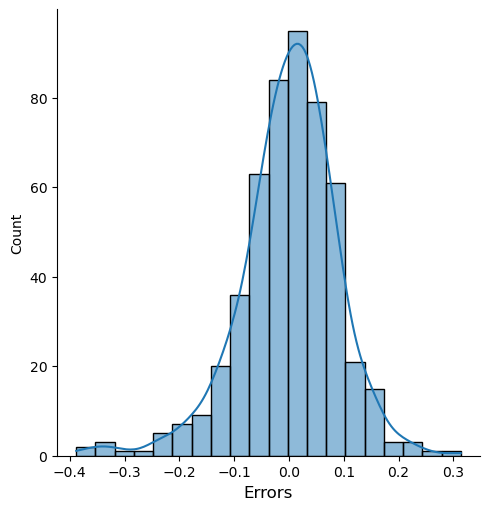

In [109]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

##### The error terms has normal distribution curve

### Homoscedasticity

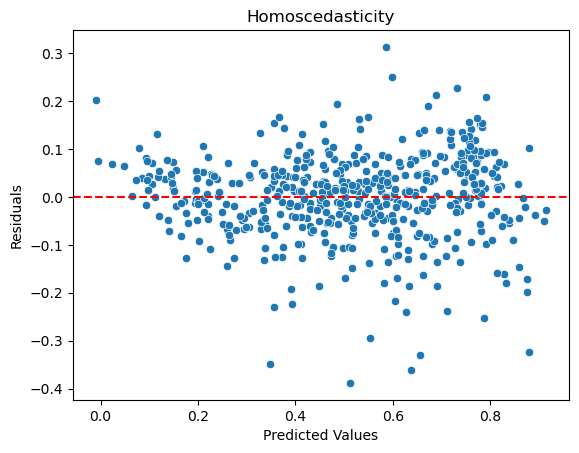

In [112]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

#### The variance of residuals is constant across all levels of the independent variables, indicating consistent levels of variability.

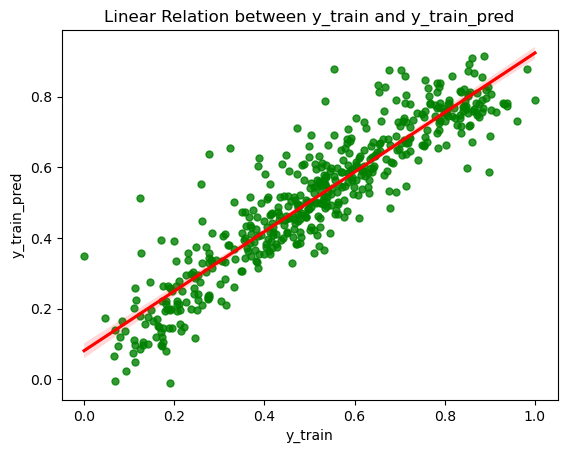

In [114]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'green' })

# Show the plot
plt.title('Linear Relation between y_train and y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

### Mean Squared Error(MSE) of the training set

In [116]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE={mse_train}')

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
print(f'RMSE={rmse_train}')

MSE=0.0078830675181914
RMSE=0.08878664042631301


### Test the model using the test data

In [118]:
# Retain only the selected feature from the final model
X_test_scaled = X_test[X_train_rfe4.columns]
X_test_scaled.head()

,temp,hum,windspeed,season_Summer,season_Winter,yr_1,mnth_July,mnth_September,weekday_Sunday,workingday_1,weathersit_Mist,weathersit_Rainy
184,0.831783,0.655956,0.121812,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
535,0.901354,0.608826,0.188468,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.511964,0.835904,0.361537,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
221,0.881625,0.436161,0.366681,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.817246,0.313625,0.556403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [120]:
# Get the predicted values from the linear model
y_test_pred = train_final_model.predict(X_test_sm)

#### Calculating Rsquare Scores and Adjusted Rsquare Scores for the test set

In [122]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.81

In [123]:
#Calculating adjusted R squared:
n = X_test_scaled.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_scaled.shape[1]

r2 = r2_score_test

# Calculating Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(adjusted_r2, 2)


0.8

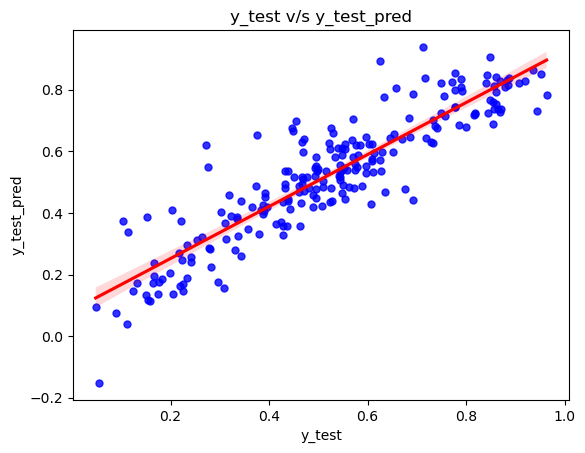

In [124]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

### Mean Squared Error (MSE) and (RMSE) of the test set

In [126]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE={mse_test}')

# Calculate RMSE
rmse_test = np.sqrt(mse_test)
print(f'RMSE={rmse_test}')

MSE=0.009230524650405175
RMSE=0.09607561943805085


### Model Train & Test Statistics Comparison

| Measurement                | Train Dataset | Test Dataset |
|----------------------------|---------------|--------------|
| R-squared Value            | 84.3%         | 81%          |
| Adjusted R-squared Value   | 83.9%         | 80%          |
| Mean squared Error Value   | 0.78%         | 0.92%        |
| Root Mean squared Error    | 8.8%          | 9.60%        |

In [129]:
# Coefficients of the final model
round(train_final_model.params, 2)

const               0.18
temp                0.60
hum                -0.17
windspeed          -0.20
season_Summer       0.08
season_Winter       0.14
yr_1                0.23
mnth_July          -0.04
mnth_September      0.09
weekday_Sunday      0.06
workingday_1        0.05
weathersit_Mist    -0.05
weathersit_Rainy   -0.24
dtype: float64

#### Equation of the best fit line

In a multivariate linear regression model, the equation of the best-fit line is given by:

#### Y = β0 + β1 x1. + β2 x2. + ... + βn xn

#### For this model the best fit line is determined by the following equation:

### <font color='green'>cnt = 0.18 + 0.60 x temp. - 0.17 x hum - 0.20 x windspeed + 0.08 x season_Summer + 0.14 x season_Winter + 0.23 x yr_1 - 0.04 x mnth_July + 0.09 x mnth_September + 0.06 x weekday_Sunday + 0.05 x workingday_1 - 0.05 x  weathersit_Mist - 0.24 x weathersit_Rainy</font>

### Summary:
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

The R-squared value of the train set is 84.3% whereas the test set has a value of 81.0% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

We can conclude that the bike demands for the BoomBikes company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September had higher use of rentals. In terms of days the maximum turnaround was on days like Wed, Thurs and Sat and more on holidays.

Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to be a strong analysis done to retain the repeat customers.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. 
